In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']='simhei'
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('..\data\car.csv',encoding='gbk')
df

,city,time,title,km,排量,变速箱,origin_price,price,rule,过户次数,kg,气缸数,最大马力,oil_num
0,成都,2016,别克,7.68,1.5,自动,13.77,6.30,国5,0,1255,4缸,114,92
1,厦门,2012,雪铁龙,15.23,1.6,手动,11.59,2.50,国4,1,1331,4缸,106,92
2,厦门,2015,众泰,11.73,1.5,自动,11.17,3.80,国5,0,1460,4缸,150,92
3,嘉兴,2015,现代ix25,5.35,1.6,自动,15.50,9.00,国5,0,1377,4缸,125,92
4,南宁,2013,大众,9.25,1.4,自动,16.05,6.78,国4,1,1305,4缸,131,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13604,东莞,2018,吉利,4.58,1.8,自动,14.09,9.00,国5,0,1690,4缸,184,92
13605,宝鸡,2013,福特,5.94,1.8,手动,10.83,4.88,国5,0,1321,4缸,124,92
13606,上海,2017,宝马3系,4.19,2.0,自动,35.38,22.58,国5,2,1550,4缸,184,95
13607,嘉兴,2010,本田,14.46,2.0,自动,22.01,7.50,国4,2,1505,4缸,156,92


In [2]:
# 删除具有缺失值的行
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13597 entries, 0 to 13608
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          13597 non-null  object 
 1   time          13597 non-null  int64  
 2   title         13597 non-null  object 
 3   km            13597 non-null  float64
 4   排量            13597 non-null  float64
 5   变速箱           13597 non-null  object 
 6   origin_price  13597 non-null  float64
 7   price         13597 non-null  float64
 8   rule          13597 non-null  object 
 9   过户次数          13597 non-null  int64  
 10  kg            13597 non-null  int64  
 11  气缸数           13597 non-null  object 
 12  最大马力          13597 non-null  int64  
 13  oil_num       13597 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


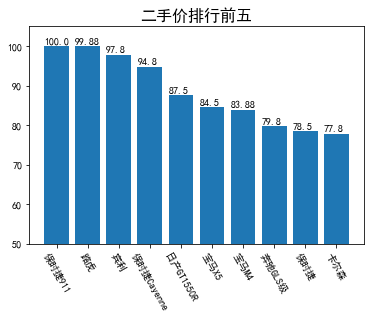

In [3]:
# 二手价排行前五
df1 = df.sort_values(by='price',ascending=False) # 按照二手价排序
df11 = df1.drop_duplicates(['title']) # 对title列去重
df111  =df11[['title','price']][:10]
df111_title = df111['title'].tolist()
df111_price = df111['price'].tolist()


plt.title('二手价排行前五',fontsize=16)
plt.bar(df111_title,df111_price)
for x,y in enumerate(df111_price):
    plt.text(x-0.4,y+0.5,y)
plt.ylim(50,105)
plt.xticks(rotation=300)
plt.savefig('../resources/二手价排行前五.jpg')
plt.show()


['苏州', '郑州', '上海', '成都', '重庆', '济南', '长沙', '广州', '北京', '合肥']
[766, 619, 543, 469, 416, 414, 413, 410, 383, 369]


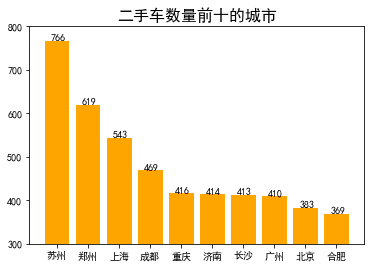

In [4]:
# 二手车数量前十的城市
df2 = df['city'].value_counts()[:10]
city = df2.index.tolist()
total = df2.values.tolist()
print(city)
print(total)


plt.title('二手车数量前十的城市',fontsize=16)
plt.bar(city,total,color='orange')
for x,y in enumerate(total):
    plt.text(x-0.2,y+0.5,y)
plt.ylim(300,800)
plt.savefig('../resources/二手车数量前十的城市.jpg')
plt.show()

['大众', '福特', '日产', '别克', '丰田', '本田', '雪佛兰', '现代', '奔驰C级', '大众POLO']
[2114, 818, 815, 779, 646, 617, 461, 390, 285, 241]


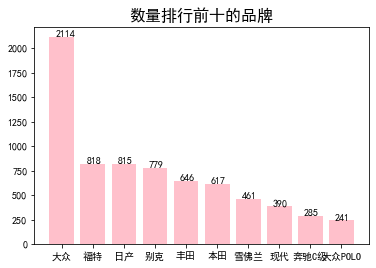

In [5]:
# 排行前十的品牌
df3 = df['title'].value_counts()[:10]
title = df3.index.tolist()
total_ = df3.values.tolist()
print(title)
print(total_)


plt.title('数量排行前十的品牌',fontsize=16)
plt.bar(title,total_,color='pink')
for x,y in enumerate(total_):
    plt.text(x-0.2,y+0.5,y)
plt.savefig('../resources/数量排行前十的品牌.jpg')
plt.show()

['宾利', '卡尔森', '保时捷911', '日产GT1550R', '路虎', '奔驰S级', '保时捷Cayenne', '宝马7系', '保时捷Panamera', '奔驰SL级']
[388.6, 312.62, 183.66, 173.68, 172.37, 151.75, 148.6, 147.41, 135.9, 133.3]
[97.8, 77.8, 100.0, 87.5, 99.88, 29.8, 78.98, 67.8, 41.28, 45.0]


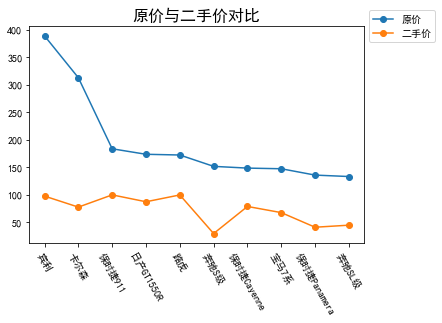

In [6]:
# 原价排行前十与二手价对比
a = df.sort_values('origin_price',ascending=False).drop_duplicates(['title'])
a1 = a[['title','origin_price','price']].head(10)
a1_title = a1['title'].tolist()
a1_origin = a1['origin_price'].tolist()
a1_now = a1['price'].tolist()

print(a1_title)
print(a1_origin)
print(a1_now)


plt.title('原价与二手价对比',fontsize=16)
plt.plot(a1_title,a1_origin,'-o',label='原价')
plt.plot(a1_title,a1_now,'-o',label='二手价')
plt.legend(loc='center left',bbox_to_anchor=[1,0.5,0.5,1])
plt.xticks(rotation=300)
plt.savefig('../resources/原价与二手价对比.jpg')
plt.show()


['大众', '福特', '日产', '别克', '丰田']
[2114, 818, 815, 779, 646]


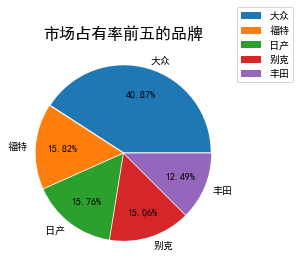

In [7]:
# 市场占有率前五的品牌
df3 = df['title'].value_counts()[:5]
df3_title = df3.index.tolist()
df3_total = df3.values.tolist()
print(df3_title)
print(df3_total)


plt.title('市场占有率前五的品牌',fontsize=16)
explode = [0.01]*len(df3_title)
plt.pie(df3_total,explode,df3_title,pctdistance=0.7,autopct='%.2f%%')
plt.legend(loc='center left',bbox_to_anchor=[1,0.5,0.5,1])
plt.savefig('../resources/市场占有率前五的品牌.jpg')
plt.show()

[2.0, 1.5, 1.6, 1.4, 1.8]
[3428, 2882, 2847, 1411, 1168]
<ipython-input-8-5a60aa62cf7b>:14: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  plt.polar(theta,pl_num)


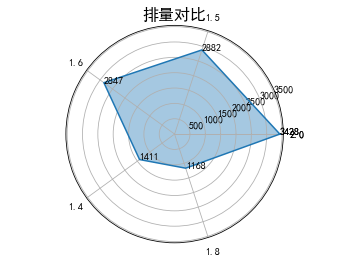

In [8]:
pl = df['排量'].value_counts()
pl_title = pl.index.tolist()[:5]
pl_num = pl.values.tolist()[:5]
print(pl_title)
print(pl_num)


plt.title('排量对比',fontsize=16)
plt.axis('off')
theta = np.linspace(0,2*np.pi,len(pl_title),endpoint=False)
theta = np.concatenate((theta,[theta[0]]))
pl_title=np.concatenate((pl_title,[pl_title[0]]))
pl_num=np.concatenate((pl_num,[pl_num[0]]))
plt.polar(theta,pl_num)
for x,y in zip(theta,pl_num):
    plt.text(x,y,y)
plt.fill(theta,pl_num,alpha=0.4)
plt.thetagrids(theta*180/np.pi,pl_title)
plt.savefig('../resources/排量对比.jpg')
plt.show()

<ipython-input-9-55acbacc50c7>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  time =df.drop(df[df['time']==3008].index|df[df['time']==4008].index)
<ipython-input-9-55acbacc50c7>:10: UserWarning: Trying to create polar plot on an Axes that does not have a polar projection.
  plt.polar()
[2355, 2081, 1422, 1362, 1351, 1305, 946, 929, 748, 431]


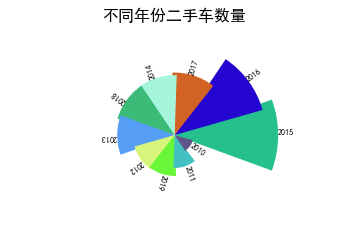

In [9]:
time =df.drop(df[df['time']==3008].index|df[df['time']==4008].index)
t1 = time['time'].value_counts()
year = t1.index.tolist()[:10]
v = t1.values.tolist()[:10]
print(v)


plt.title('不同年份二手车数量',fontsize=16)
plt.axis(False)
plt.polar()
theta = np.linspace(0,2*np.pi,len(year),endpoint=False)
plt.bar(theta,v,width=0.7,color=np.random.random((len(year), 3)))
for i in range(len(year)):
            plt.text(theta[i], v[i], year[i],
                     rotation=theta[i] * 180 / np.pi,  # 文字角度
                     rotation_mode='anchor',  # 标签起始位置不再是左上角
                     size=8)
plt.axis(False)
# plt.savefig('../resources/不同年份二手车数量.jpg')
plt.show()
